In [66]:
#Import Dependencies
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
path = "Resources/Privacy_concern.csv"
df = pd.read_csv(path)
df

,Survey ID,Privacy concern
0,1,Not concerned
1,2,Mildly concerned
2,3,Not concerned
3,4,Very concerned
4,5,I don't know
...,...,...
2991,2992,I don't know
2992,2993,Moderately concerned
2993,2994,Mildly concerned
2994,2995,Not concerned


In [67]:
#Breakdown Privacy Concern levels into groups
df=df.groupby("Privacy concern").count()
df=df.rename(columns={"Survey ID":"Total"})
df

,Total
Privacy concern,
I don't know,353
Mildly concerned,622
Moderately concerned,598
Not concerned,643
Very concerned,780


In [68]:
#Sort levels of concerns from high to low
df['Index']=[2,3,4,1,5]
df = df.reset_index().set_index('Index')
df = df.sort_values('Index')
df = df.set_index('Privacy concern')
df

,Total
Privacy concern,
Not concerned,643
I don't know,353
Mildly concerned,622
Moderately concerned,598
Very concerned,780


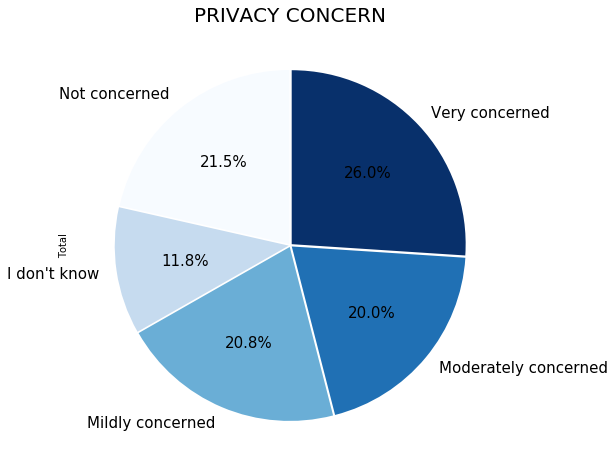

In [69]:
#Plot Pie Chart
explode = (.01,.01,.01,.01,.01)
color_map = plt.cm.get_cmap('Blues')
plot = df.plot.pie(x="Privacy concern",y="Total",figsize=(20, 8),startangle=90,fontsize=15,explode=explode,autopct="%1.1f%%",legend=False,cmap=color_map)
plt.title("PRIVACY CONCERN",fontsize=20)
plt.show()

In [70]:
#Read data from Income Survey for smart speaker ownership
path = "Resources/Income Breakdown.csv"
income = pd.read_csv(path)
income

,Survey ID,Annual Income ($),Smart Speaker Ownership
0,1,30K - 75K,No
1,2,Less than 30K,No
2,3,More than 75K,No
3,4,30K - 75K,No
4,5,30K - 75K,Yes
...,...,...,...
2398,2400,Less than 30K,No
2399,2401,Less than 30K,No
2400,2402,30K - 75K,No
2401,2403,30K - 75K,No


In [71]:
#Analysis of low income group (Income <$30k per year):
low = income[income["Annual Income ($)"]=="Less than 30K"]
low = low[["Survey ID", "Smart Speaker Ownership"]]
low

,Survey ID,Smart Speaker Ownership
1,2,No
7,8,Yes
11,12,No
14,15,No
19,21,No
...,...,...
2391,2393,Yes
2394,2396,No
2395,2397,No
2398,2400,No


In [72]:
low = low.groupby("Smart Speaker Ownership").count()
low = low.rename(columns={"Survey ID":"Total Ownerships"})
low

,Total Ownerships
Smart Speaker Ownership,
No,527
Yes,93


In [73]:
low["Percentage"]=low["Total Ownerships"]/620*100
low

,Total Ownerships,Percentage
Smart Speaker Ownership,,
No,527,85.0
Yes,93,15.0


In [74]:
#Consolidate 3 Income Groups
a = pd.DataFrame({"Owning Smart Speakers":[15,24,34],"Not Owning Smart Speakers":[85,76,66],"Income Level":["Less than 30K","30K-75K",
                                                                  "More than 75K"]
                 })
a.set_index('Income Level', inplace=True)
a

,Owning Smart Speakers,Not Owning Smart Speakers
Income Level,,
Less than 30K,15,85
30K-75K,24,76
More than 75K,34,66


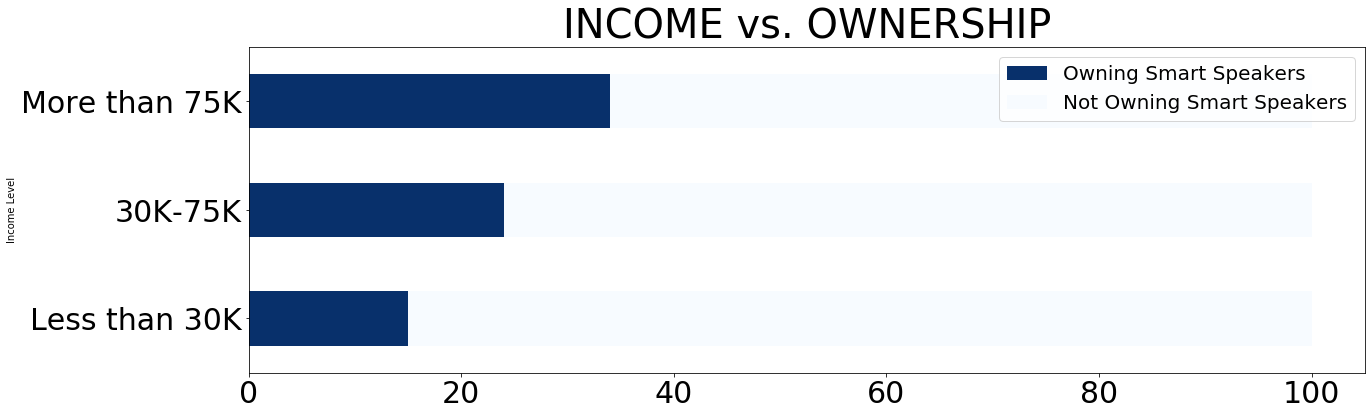

In [100]:
#Plot the chart by Income Group
reversed_color_map = color_map.reversed()
a.plot( kind='barh',figsize=(20, 6), stacked=True, title='Chart', mark_right=True,cmap=reversed_color_map,fontsize=30)
plt.title("INCOME vs. OWNERSHIP",fontsize=40)

plt.legend(loc=1, prop={'size': 20})
plt.show()